In [160]:
!pip freeze

absl-py==0.6.1
alembic==0.8.10
apache-airflow==1.9.0
asn1crypto==0.24.0
astor==0.7.1
avro==1.8.2
backports-abc==0.5
backports.functools-lru-cache==1.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.5.0.1
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bleach==2.1.2
blinker==1.4
bokeh==1.0.3
brewer2mpl==1.4.1
bs4==0.0.1
cachetools==2.1.0
certifi==2018.11.29
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
configparser==3.5.0
crcmod==1.7
croniter==0.3.26
cryptography==2.3.1
cycler==0.10.0
cytoolz==0.9.0.1
dask==0.17.1
datalab==1.1.3
decorator==4.3.0
dill==0.2.6
distributed==1.21.8
docutils==0.14
entrypoints==0.2.3
enum34==1.1.6
fastcache==1.0.2
Flask==0.11.1
Flask-Admin==1.4.1
Flask-Cache==0.13.1
Flask-Login==0.2.11
flask-swagger==0.2.13
Flask-WTF==0.14
funcsigs==1.0.0
functools32==3.2.3.post2
future==0.16.0
futures==3.2.0
gast==0.2.2
ggplot==0.6.8
gitdb2==2.0.5
GitPython==2.1.11
google-api-core==0.1.4
google-api-python-client==1.6.2
google-apitools

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [162]:
!pip install google-cloud

In [163]:
%bash
apt-get update
apt-get -y install python-mpltoolkits.basemap

Hit:1 http://storage.googleapis.com/dataproc-bigtop-repo/1_3_deb9_20190306_012600-RC01 dataproc InRelease
Get:2 http://ftp.us.debian.org/debian testing InRelease [158 kB]
Hit:4 http://archive.ubuntu.com/ubuntu xenial InRelease
Get:3 http://cdn-fastly.deb.debian.org/debian stretch-backports InRelease [91.9 kB]
Get:5 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]
Get:6 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]
Get:7 http://ftp.us.debian.org/debian testing/main Sources.diff/Index [27.9 kB]
Get:8 http://ftp.us.debian.org/debian testing/main Sources 2019-04-07-0216.46.pdiff [4,663 B]
Get:9 http://ftp.us.debian.org/debian testing/main Sources 2019-04-07-1413.39.pdiff [772 B]
Get:9 http://ftp.us.debian.org/debian testing/main Sources 2019-04-07-1413.39.pdiff [772 B]
Get:10 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]
Fetched 609 kB in 1s (426 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree.

In [164]:
%bigquery schema --table brooklyn_homes.2013_housing_sales

In [165]:
%bigquery schema --table brooklyn_homes.2017_housing_sales

In [166]:
%bigquery schema --table brooklyn_homes.2016_housing_sales

In [167]:
%bigquery schema --view refined-window-228202:brooklyn_homes.brooklyna

In [168]:
import google.datalab.bigquery as bq
sql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,TAX_CLASS_AT_TIME_OF_SALE ,NEIGHBORHOOD  from `brooklyn_homes.brooklyna` 
"""
df = bq.Query(sql).execute().result().to_dataframe()


In [169]:
df.head()

,SALE_PRICE,GROSS_SQUARE_FEET,TAX_CLASS_AT_TIME_OF_SALE,NEIGHBORHOOD
0,982611.0,NaN,2.0,BEDFORD STUYVESANT
1,813581.0,NaN,2.0,BEDFORD STUYVESANT
2,784090.0,NaN,2.0,BEDFORD STUYVESANT
3,766935.0,NaN,2.0,BEDFORD STUYVESANT
4,1634291.0,NaN,2.0,BEDFORD STUYVESANT


In [170]:
df.describe()

,SALE_PRICE,GROSS_SQUARE_FEET,TAX_CLASS_AT_TIME_OF_SALE
count,3.453720e+05,3.453620e+05,345372.000000
mean,4.803584e+05,3.101535e+03,1.647178
std,2.644632e+06,1.566985e+04,0.915807
min,0.000000e+00,0.000000e+00,1.000000
25%,0.000000e+00,0.000000e+00,1.000000
50%,2.600000e+05,1.848000e+03,1.000000
75%,5.700000e+05,3.000000e+03,2.000000
max,8.696129e+08,2.548000e+06,4.000000


In [171]:
sql = ''' 
SELECT _SALE_PRICE__ ,GROSS_SQUARE_FEET_ ,TAX_CLASS_AT_TIME_OF_SALE_ , NEIGHBORHOOD_  
FROM `brooklyn_homes.2013_housing_sales` 
'''
df1 = bq.Query(sql).execute().result().to_dataframe()

In [172]:
df1.describe()

,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_
count,2.484200e+04,24842.000000
mean,3.088459e+03,1.681869
std,1.841045e+04,0.911237
min,0.000000e+00,1.000000
25%,0.000000e+00,1.000000
50%,1.790000e+03,1.000000
75%,3.000000e+03,2.000000
max,1.324592e+06,4.000000


In [173]:
df1.head()

,_SALE_PRICE__,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,$-,28400.0,2.0,BATH BEACH
1,"$4,050,000.00",27000.0,2.0,BATH BEACH
2,$-,8760.0,2.0,BATH BEACH
3,$-,42720.0,2.0,BATH BEACH
4,"$2,000,000.00",17800.0,2.0,BAY RIDGE


In [174]:
sql = '''SELECT SALE_PRICE_ ,GROSS_SQUARE_FEET_ ,TAX_CLASS_AT_TIME_OF_SALE_ ,
NEIGHBORHOOD_  FROM `brooklyn_homes.2016_housing_sales` '''
df2 = bq.Query(sql).execute().result().to_dataframe()
df2.head()

,SALE_PRICE_,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,-,"24,880",2,BAY RIDGE
1,-,"24,880",2,BAY RIDGE
2,"4,600,000","17,280",2,BAY RIDGE
3,"1,845,000","7,740",2,BAY RIDGE
4,"6,400,000","12,609",2,BAY RIDGE


In [175]:
sql = '''SELECT SALE_PRICE_ ,GROSS_SQUARE_FEET_ ,
TAX_CLASS_AT_TIME_OF_SALE_ , NEIGHBORHOOD_  FROM `brooklyn_homes.2017_housing_sales` '''
df3 = bq.Query(sql).execute().result().to_dataframe()
df3.head()

,SALE_PRICE_,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,0,"43,600",2,BATH BEACH
1,0,"12,160",2,BAY RIDGE
2,3410000,"12,160",2,BAY RIDGE
3,4850000,"12,000",2,BAY RIDGE
4,5300000,"12,001",2,BAY RIDGE


In [176]:
df.dtypes

SALE_PRICE                   float64
GROSS_SQUARE_FEET            float64
TAX_CLASS_AT_TIME_OF_SALE    float64
NEIGHBORHOOD                  object
dtype: object

In [177]:
df1.dtypes

_SALE_PRICE__                  object
GROSS_SQUARE_FEET_            float64
TAX_CLASS_AT_TIME_OF_SALE_    float64
NEIGHBORHOOD_                  object
dtype: object

In [178]:
df2.dtypes

SALE_PRICE_                   object
GROSS_SQUARE_FEET_            object
TAX_CLASS_AT_TIME_OF_SALE_     int64
NEIGHBORHOOD_                 object
dtype: object

In [179]:
df3.dtypes

SALE_PRICE_                    int64
GROSS_SQUARE_FEET_            object
TAX_CLASS_AT_TIME_OF_SALE_     int64
NEIGHBORHOOD_                 object
dtype: object

In [180]:
df1=df1.rename(index=str,columns ={"_SALE_PRICE__":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                               "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})
df2=df2.rename(index=str,columns ={"SALE_PRICE_":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                              "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})
df3=df3.rename(index=str,columns ={"SALE_PRICE_":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                              "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})

In [181]:
sql = '''select round(avg(SALE_PRICE),3) as AVG_SALE_PRICE,2019-YEAR_BUILT as age from `brooklyn_homes.brooklyna` where YEAR_BUILT > 2002 
group by age having AVG_SALE_PRICE<>0 order by AVG_SALE_PRICE desc
'''
df4 =  bq.Query(sql).execute().result().to_dataframe()

In [182]:
df4

,AVG_SALE_PRICE,age
0,1185601.823,5
1,1157770.066,4
2,1080826.595,6
3,829094.213,3
4,792131.270,2
5,711269.461,7
6,651446.280,10
7,594361.955,11
8,590764.660,1
9,588616.028,8


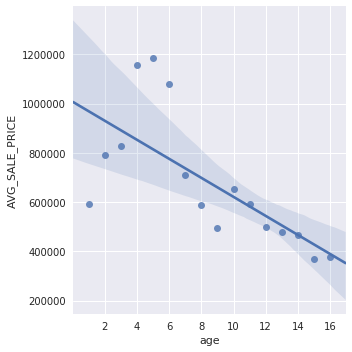

In [184]:
#y_pos = np.arange(len(objects))
ax = sns.lmplot(x="age", y="AVG_SALE_PRICE", data=df4)


In [189]:
# sql ="""select TOTAL_UNITS ,2019-YEAR_BUILT as age
# from `brooklyn_homes.brooklyna`  where YEAR_BUILT > 2002 and TOTAL_UNITS is not NULL order by age desc"""

In [209]:
sql = '''select SALE_PRICE,GROSS_SQUARE_FEET 
 from `brooklyn_homes.brooklyna` where LAND_SQUARE_FEET is not null and GROSS_SQUARE_FEET is not null 
and GROSS_SQUARE_FEET <> 0 and GROSS_SQUARE_FEET< 500000 and SALE_PRICE>50000 order by SALE_PRICE desc 
'''
df5 = bq.Query(sql).execute().result().to_dataframe()

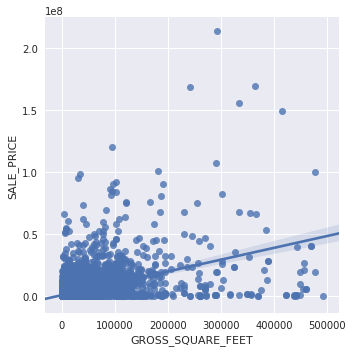

In [210]:
#ax = sns.lmplot(x="SALE_PRICE", y="divo", data=df4)
ax = sns.lmplot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',data=df5)

In [211]:
sql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,LAND_SQUARE_FEET  from `brooklyn_homes.brooklyna` 
"""
df6 = bq.Query(sql).execute().result().to_dataframe()

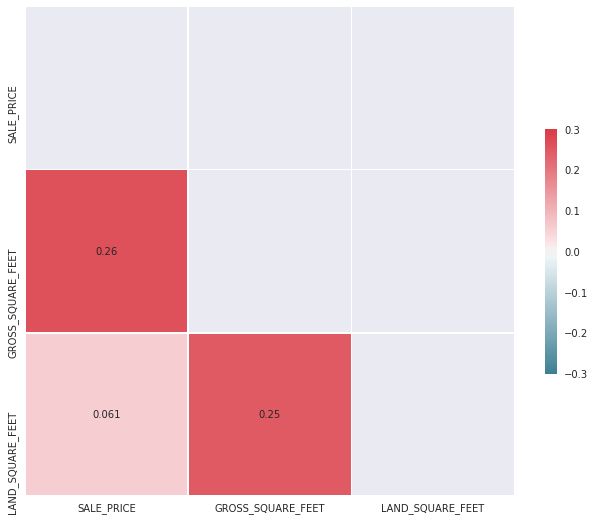

In [215]:
corr = df6.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [226]:
sql = """
select round(avg(SALE_PRICE),2) AVG_SALE_PRICE ,NEIGHBORHOOD from `brooklyn_homes.brooklyna`
group by NEIGHBORHOOD order by AVG_SALE_PRICE desc   LIMIT 20
"""
df7 = bq.Query(sql).execute().result().to_dataframe()

In [232]:
!pip install WordCloud

    100% |████████████████████████████████| 348kB 8.0MB/s eta 0:00:01


In [233]:
!pip install STOPWORDS

    100% |████████████████████████████████| 51kB 2.4MB/s ta 0:00:011
  Running setup.py bdist_wheel for STOPWORDS ... done
  Stored in directory: /root/.cache/pip/wheels/39/fa/c7/c4c5111e658f5c58465d948165dc3395a3c10ff57f4cd20356
Successfully built STOPWORDS


In [251]:
from wordcloud import WordCloud, STOPWORDS
df7['NEIGHBORHOOD'] = df7['NEIGHBORHOOD'].map(lambda x:x.strip())
df8 = df7.set_index('NEIGHBORHOOD').to_dict()
df8['AVG_SALE_PRICE']


{u'BOERUM HILL': 1850729.51,
 u'BROOKLYN HEIGHTS': 1661176.09,
 u'BROOKLYN-UNKNOWN': 1291707.98,
 u'BUSH TERMINAL': 7760088.23,
 u'COBBLE HILL': 1775665.17,
 u'DOWNTOWN-FULTON FERRY': 2202786.25,
 u'DOWNTOWN-FULTON MALL': 1251379.75,
 u'DOWNTOWN-METROTECH': 3158885.81,
 u'GOWANUS': 3451808.57,
 u'GREENPOINT': 1430584.81,
 u'JAMAICA BAY': 14150000.0,
 u'KENSINGTON': 1834431.25,
 u'NAVY YARD': 2150119.71,
 u'PARK SLOPE': 1300743.61,
 u'PROSPECT HEIGHTS': 1931948.17,
 u'RED HOOK': 7117272.0,
 u'SPRING CREEK': 45284718.6,
 u'WILLIAMSBURG-EAST': 1274423.18,
 u'WILLIAMSBURG-NORTH': 1387250.46,
 u'WILLIAMSBURG-SOUTH': 1302580.43}

In [243]:
def random_color_func(word = None,font_size= None,position= None,orientation=None,font_path = None,random_state = None):
    h = int(360.0*tone/255.0);
    s = int(100.0*255.0/255.0);
    l = int(100.0*float(random_state.randint(70,120))/255.0)
    return "hsl({},{}%,{}%)".format(h,s,l)

(-0.5, 399.5, 199.5, -0.5)

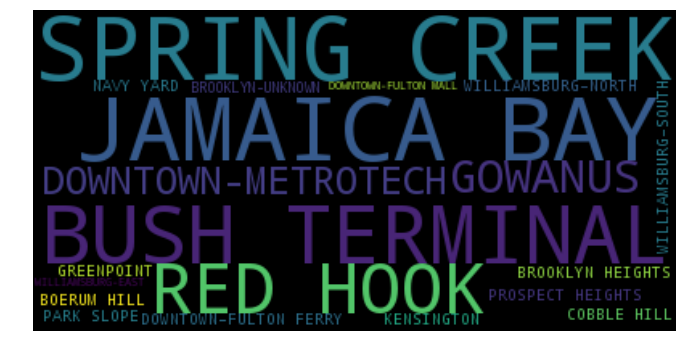

In [264]:
wordcloud = WordCloud(background_color = 'Black',
                      relative_scaling =0)
fig = plt.figure(1,figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
wordcloud.generate_from_frequencies(df8['AVG_SALE_PRICE']);
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.axis('off')